# Feature Engineering

In [50]:
# Define Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# For Regression Problems
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# For Classification Problems
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Evaluate Regression Models
from sklearn.metrics import mean_squared_error

# Evaluate Classification Models
from sklearn.metrics import roc_auc_score

# 1. Missing Values

Missing Value terjadi ketika tidak ada data/tidak ada nilai yang disimpan untuk observasi tertentu dalam suatu variabel. Missing Values hal yang biasa terjadi baik dalam kompetisi ilmu data maupun dalam domain bisnis, dan dapat berdampak signifikan pada kesimpulan yang dapat diambil dari data tersebut. Data yang tidak lengkap merupakan masalah yang tidak dapat dihindari dalam menangani sebagian besar sumber data.

## Kenapa bisa terjadi Missing Values?

Ada berbagai alasan mengapa data bisa hilang :

- Suatu nilai dapat hilang atau tidak tersimpan dengan baik pada saat pengumpulan data.
    Bayangkan misalnya bahwa data tersebut berasal dari survei, dan data tersebut dimasukkan secara manual ke dalam formulir online. Entri data dapat dengan mudah lupa untuk melengkapi bidang dalam formulir, dan oleh karena itu, nilai untuk formulir itu akan hilang.
- Nilai tidak ada/tidak tersedia.
    Contoh : Variabel yang dibuat dengan membagi satu variabel dengan variabel lainnya, seperti rasio utang terhadap pendapatan. Jika orang tersebut tidak memiliki pendapatan, kami tidak dapat menghasilkan nilai karena pembagian dengan nol tidak ditentukan.
- Data yang hilang juga muncul ketika orang menolak untuk menjawab pertanyaan tertentu saat mengisi formulir.
    Orang yang ditanya mungkin tidak ingin mengungkapkan jawaban atas salah satu pertanyaan, misalnya, pendapatannya. Itu akan menjadi nilai yang hilang untuk orang itu.

Bersama dengan memahami sumber data yang hilang, penting untuk memahami mekanisme yang digunakan untuk memasukkan bidang yang hilang dalam kumpulan data. Bergantung pada mekanismenya, kami dapat memilih untuk memproses nilai yang hilang secara berbeda. Selain itu, dengan mengetahui sumber data yang hilang, kita dapat memilih untuk mengambil tindakan untuk mengontrol sumber tersebut, dan mengurangi jumlah data yang hilang selama pengumpulan data.

### Titanic Datasets

Mungkin salah satu bangkai kapal paling terkenal dalam sejarah, Titanic tenggelam setelah bertabrakan dengan gunung es, menewaskan 1502 dari 2224 orang di dalamnya. Menariknya, dengan menganalisis kemungkinan bertahan hidup berdasarkan beberapa atribut seperti jenis kelamin, usia, dan status sosial, kami dapat membuat prediksi yang sangat akurat tentang penumpang mana yang akan bertahan.

Beberapa kelompok orang lebih mungkin untuk bertahan hidup daripada yang lain, seperti wanita, anak-anak, dan kelas atas. Oleh karena itu, kita bisa belajar tentang prioritas dan keistimewaan masyarakat saat itu.

#### Data Description


| Variable | Definition | Key |
| --- | --- | --- |
| Survival | Survival | 0 = No, <br><br> 1 = Yes |
| Pclass	| Passenger class	<br><br> (is a proxy for socio-economy class)| 1 = 1st (Upper), <br><br> 2 = 2nd (Middle), <br><br> 3 = 3rd (Lower) |
| Sex	| Sex	| - |
| Age	| Age in years | - |
| Sibsp |	Number of siblings / spouses aboard the Titanic	| - |
| Parch	| Number of parents / children aboard the Titanic	| - |
| Ticket |	Ticket number	| - |
| Fare	| Passenger fare	<br><br> (in GBP) | - |
| Cabin	| Cabin number | - |
| Embarked	| Port of Embarkation	| C = Cherbourg, <br><br> Q = Queenstown, <br><br> S = Southampton |

#### Data Loading

In [51]:
# Load Titanic Dataset

data_titanic_ori = pd.read_csv('dataset/data_titanic_train.csv')
data_titanic = data_titanic_ori.copy()
data_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [52]:
# Check Missing Values

data_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [53]:
# Check Missing Values as Percentage to Total Data

data_titanic.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

### Missing Data Mechanisms

Ada 3 mekanisme yang menyebabkan hilangnya data, 2 di antaranya melibatkan data yang hilang secara acak atau hampir acak (random), dan yang ketiga melibatkan hilangnya data secara sistematis.

#### 1. Missing Completely at Random (MCAR)

Ciri-ciri :

- **Probabilitas yang hilang adalah sama untuk semua pengamatan (baris)**.
- Sama sekali **tidak ada hubungan antara data yang hilang dan nilai lainnya, yang diamati atau hilang, di dalam kumpulan data**. Dengan kata lain, titik-titik data yang hilang itu adalah bagian acak dari data. Tidak ada yang sistematis terjadi yang membuat beberapa data lebih mungkin hilang daripada yang lain.
- Mengabaikan kasus-kasus tersebut tidak akan membuat kesimpulan yang dibuat bias (hanya jika jumlah total missing values kecil).

In [54]:
# check missing values for variable "Embraked"

data_titanic[data_titanic.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Seperti yang Anda lihat di atas, Miss Icard dan Mrs Stones bepergian bersama. Hal ini terlihat dari jenis Tiket yang sama. Setelah mencari di internet, ditemukan bahwa Nona Icard adalah pembantu Nyonya Stone.

Kesimpulan dari missing values dari kolom Embarked (berdasarkan asumsi pribadi) :

- Tampaknya tidak ada indikasi bahwa informasi yang hilang dalam variabel Embarked bergantung pada variabel lain.
- Fakta bahwa para wanita ini selamat, berarti mereka mungkin dimintai informasi ini.
-Kemungkinan besar ketidakhadiran ini dihasilkan pada saat membangun kumpulan data dan oleh karena itu kita dapat berasumsi bahwa itu benar-benar acak.
- Kita dapat berasumsi bahwa probabilitas hilangnya data untuk 2 wanita ini sama dengan probabilitas hilangnya variabel ini untuk orang lain. Tentu saja ini akan sulit, jika mungkin sama sekali, untuk dibuktikan.

#### 2. Missing at Random (MAR)

Ciri-ciri :

- **Probabilitas pengamatan yang hilang hanya bergantung pada informasi yang tersedia**.

- **Ada hubungan sistematis antara kecenderungan missing value dan data yang diamati**.


#### 3. Missing Not At Random (MNAR)

Ciri-ciri :

- **Ada mekanisme atau alasan mengapa nilai yang hilang dimasukkan ke dalam** kumpulan data.

- Hilangnya mereka tergantung pada informasi yang tidak tercatat dalam dataset.

- Dalam situasi ini, lebih baik kita menandai nilai-nilai yang hilang itu untuk memprediksi target kita.


Bikin asumsi dari data titanic :
- Banyak orang yang tidak selamat, umur yang mereka miliki atau kabin tempat mereka tempati tidak dapat ditentukan. Orang-orang yang selamat dapat dimintai informasinya.


Dari asumsi diatas kami menyatakan bahwa hilangnya data 'Age' dan 'Cabin' merupakan efek dari parameter 'survived' yaitu 0 dimana penumpang tidak selamat.

In [55]:
# Create a variable that indicates whether the value of the variable `cabin` is missing or not

data_titanic = data_titanic_ori.copy()
data_titanic['cabin_null'] = np.where(data_titanic.Cabin.isnull(), 1, 0) #kalau Null = 1, tidak null = 0
data_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [56]:
# Grouping data by Survived vs Non-Survived and find nulls for cabin

print('Value Counts')
print(data_titanic.groupby(['Survived'])['cabin_null'].value_counts())

print('\nMean')
print(data_titanic.groupby(['Survived'])['cabin_null'].mean())

Value Counts
Survived  cabin_null
0         1             481
          0              68
1         1             206
          0             136
Name: cabin_null, dtype: int64

Mean
Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64


Kami mengamati bahwa persentase nilai yang hilang lebih tinggi untuk orang yang tidak selamat (0,87), dibandingkan dengan orang yang selamat (0,60). Temuan ini sejalan dengan asumsi kami bahwa data hilang karena setelah orang meninggal, informasi tidak dapat diambil.

Karena itu, untuk benar-benar mendukung apakah data yang hilang tidak secara acak, kita harus sangat mengenal cara data dikumpulkan. Menganalisis kumpulan data, hanya dapat mengarahkan kita ke arah yang benar atau membantu kita membangun asumsi tetapi itu tidak akan memberikan bukti akhir mengapa data hilang.

In [57]:
# Create a variable that indicates whether the value of the variable `Age` is missing or not

data_titanic['age_null'] = np.where(data_titanic.Age.isnull(), 1, 0)
data_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null,age_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0


In [58]:
# Grouping data by Survived vs Non-Survived and find nulls for `Age`

print('Value Counts')
print(data_titanic.groupby(['Survived'])['age_null'].value_counts())

print('\nMean')
print(data_titanic.groupby(['Survived'])['age_null'].mean())

Value Counts
Survived  age_null
0         0           424
          1           125
1         0           290
          1            52
Name: age_null, dtype: int64

Mean
Survived
0    0.227687
1    0.152047
Name: age_null, dtype: float64


Sekali lagi, kami mengamati peningkatan data yang hilang untuk orang-orang yang tidak selamat dari tragedi itu. Oleh karena itu, analisis menyarankan:

Ada kehilangan data yang sistematis: orang yang tidak bertahan hidup cenderung kehilangan lebih banyak informasi. Agaknya, metode yang dipilih untuk mengumpulkan informasi, berkontribusi pada pembuatan data yang hilang ini.

### Complete Case Analysis

CCA juga disebut penghapusan kasus berdasarkan daftar, terdiri dari membuang pengamatan di mana nilai dalam salah satu variabel hilang. CCA berarti secara harfiah menganalisis hanya pengamatan yang ada informasi di semua variabel (Xs)

CCA dapat diterapkan untuk kedua variabel kategorikal dan numerik.

Asumsi :
- **CCA bekerja dengan baik ketika data hilang sepenuhnya secara acak (MCAR)**.
- Dalam hal ini, mengecualikan pengamatan dengan data yang hilang akan sama dengan mengecualikan beberapa pengamatan secara acak dari kumpulan data, mengingat data yang hilang benar-benar acak.
- **Bekerja dengan baik jika jumlah total missing values-nya kecil**.

Keuntungan :
- Mudah untuk diimpelentasi
- Kumpulan data yang sama (walaupun kumpulan yang dikurangi) digunakan untuk semua analisis (tidak ada manipulasi data)
- Mempertahankan distribusi variabel (jika data adalah MCAR, maka distribusi variabel dari kumpulan data yang direduksi/dikurangi harus sesuai dengan distribusi dalam kumpulan data asli)

Kekurangan :
- Ini dapat mengecualikan sebagian besar sampel asli, yang berpotensi informatif untuk analisis

- CCA akan menjadi bias jika kasus lengkap secara sistematis berbeda dari sampel asli (misalnya ketika informasi yang hilang sebenarnya MAR (Missing At Random) atau MNAR (Missing Not At Random).

#### Studi Kasus

Lihat dataset Titanic. Asumsi bahwa missing values-nya adalah MCAR, yang mana bukan, jika kami memilih untuk menghapus semua observasi/pengamatan yang hilang, kami akan berakhir dengan kumpulan data yang sangat kecil, mengingat bahwa "cabin" hilang untuk 77% pengamatan.

In [59]:
# Count How Many Observations that We Would Drop

data_titanic = data_titanic_ori.copy()
print('Total passengers in the Titanic               : ', data_titanic.shape[0]) #shape[0] menandakan baris
print('Total passengers with values in all variables : ', data_titanic.dropna().shape[0]) #dihapus baris yg memiliki NaN
print('Percentage of data without missing values (%) : ', data_titanic.dropna().shape[0] / np.float(data_titanic.shape[0]) * 100)

Total passengers in the Titanic               :  891
Total passengers with values in all variables :  183
Percentage of data without missing values (%) :  20.53872053872054


Faktanya, kami memiliki informasi lengkap hanyak untuk 20% dari pengamatan kami di dataset Titanic. Dengan demikian, CCA tidak akan menjadi opsi untuk kumpulan data ini.

Namun, kita dapat memilih untuk :
Faktanya, kami memiliki informasi lengkap hanya untuk 20% dari pengamatan kami di kumpulan data Titanic. Dengan demikian, CCA tidak akan menjadi opsi untuk dataset ini.

Namun, kita dapat memilih untuk:

- Ganti nilai yang hilang dalam variabel Age and Cabin dengan metode yang sesuai (seperti pada bagian berikutnya), dan

- Hapus pengamatan di mana Embarked tidak ada. Itu akan menghapus hanya 2 pengamatan dari seluruh dataset.

### Distribution of the dataset after CCA

Jika kami menghapus sejumlah besar pengamatan yang hilang, kumpulan data baru yang berisi orang-orang yang semua datanya tersedia, akan sangat berbeda dari grup aslinya. Lihat di bawah:

In [60]:
# Check How Many Missing Values in Variable `Age` Only

data_titanic.Age.isnull().sum()

177

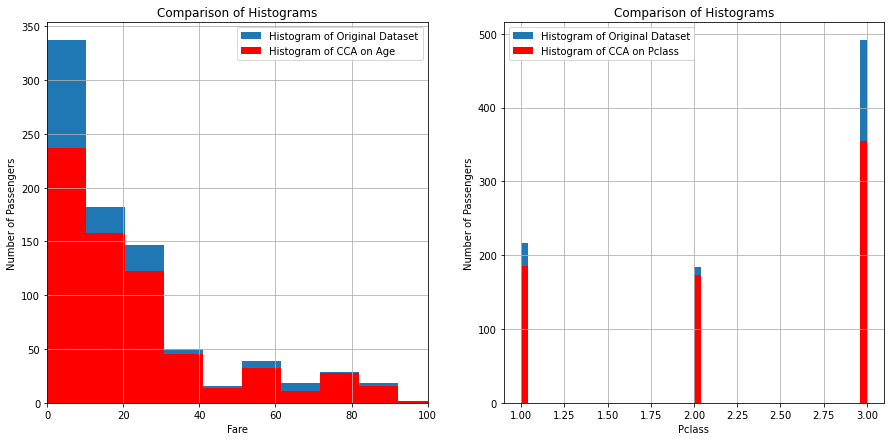

In [61]:
# Visualization of Histogram Differences between the Original Dataset and CCA for the Variable `Age` Only
# We Will Check the Effect of CCA Only to Variable `Fare` and `Pclass`

fig, ax = plt.subplots(1, 2, figsize=(15,7)) # satu baris, dua kolom

data_titanic.Fare.hist(bins=50, ax=ax[0], label='Histogram of Original Dataset')
data_titanic.dropna(axis=0, subset=['Age'])['Fare'].hist(bins=50, ax=ax[0], color='red', label='Histogram of CCA on Age') # Histogram of CCA on Age
ax[0].set_xlim(0,100)
ax[0].set_title('Comparison of Histograms')
ax[0].set_xlabel('Fare') # tarif
ax[0].set_ylabel('Number of Passengers')
ax[0].legend(loc="upper right")

data_titanic.Pclass.hist(bins=50, ax=ax[1], label='Histogram of Original Dataset') # Histogram of original dataset
data_titanic.dropna(axis=0, subset=['Age'])['Pclass'].hist(bins=50, ax=ax[1], color='red', label='Histogram of CCA on Pclass') # Histogram of CCA on Pclass
ax[1].set_title('Comparison of Histograms')
ax[1].set_xlabel('Pclass')
ax[1].set_ylabel('Number of Passengers')
ax[1].legend(loc="upper left")

Membandingkan histogram merah dan biru kita dapat mengamati bahwa distribusi seluruh dataset sebelum CCA tidak cocok dengan dataset setelah CCA. Ada banyak orang yang kehilangan Age, yang membayar tarif lebih rendah ntuk mendapatkan titanic.

Demikian pula, dataset asli menunjukkan proporsi yang lebih tinggi dari orang-rang bepergian di Pclass 3.

Mengingat bahwa distribusi variabel antara dataset asli dan setelah CCA tidak ekuivalen, CCA bukan pilihan terbaik.

#### Suggestion (Saran)

Dalam praktiknya, **CCA mungkin merupakan metode yang dapat diterima ketika jumlah informasi yang hilang sedikit. Sayangnya, tidak ada aturan praktis untuk menentukan berapa banyak data yang hilang kecil atau dapat diabaikan**.

Dalam banyak kumpulan data kehidupan nyata, jumlah data yang hilang tidak pernah sedikit, dan oleh karena itu CCA biasanya tidak pernah menjadi pilihan.

Untuk membangun model pembelajaran mesin, sebaiknya ganti nilai yang hilang dengan salah satu metode. Namun, untuk analisis cepat, jika jumlah nilai yang hilang tidak besar, ini bisa menjadi pendekatan termudah dan tercepat.

### Mean and Median Imputation

Imputasi adalah **tindakan mengganti data yang hilang dengan perkiraan statistik dari nilai yang hilang**. Tujuan dari teknik imputasi apa pun adalah untuk menghasilkan kumpulan data lengkap yang dapat digunakan untuk Machine Learning atau Deep Learnig.

Imputasi mean/median terdiri dari mengganti semua kemunculan nilai yang hilang (NA) dalam suatu variabel dengan:

Mean : jika variabel berdistribusi Normal/Gaussian.
Median : jika variabel memiliki distribusi yang miring (skewed distribution).

Asumsi : Data hilang sepenuhnya secara acak (MCAR).

Jika demikian halnya, kita dapat memikirkan untuk mengganti NA dengan variabel yang paling sering muncul, yang merupakan mean jika variabel memiliki distribusi Gaussian, atau median sebaliknya.

Keuntungan :

- Mudah diimplementasikan
- Cara cepat untuk mendapatkan kumpulan data lengkap

Limitation :
- Distorsi varian asli

Saat mengganti NA dengan mean atau median, varians variabel akan terdistorsi jika jumlah NA besar terhadap jumlah total pengamatan (karena nilai yang diperhitungkan tidak berbeda dari mean atau satu sama lain). Oleh karena itu menyebabkan underestimation of the variance.

- Distorsi kovarians/korelasi dengan variabel yang tersisa dalam kumpulan data.

Selain itu, perkiraan kovarians dan korelasi dengan variabel lain dalam kumpulan data juga dapat terpengaruh. Ini karena kita mungkin menghancurkan korelasi intrinsik karena mean/median yang sekarang menggantikan NA tidak akan mempertahankan hubungan dengan variabel yang tersisa.


**Imputasi harus dilakukan di atas set pelatihan (training set), dan kemudian disebarkan ke set tes (test set)**. Ini berarti bahwa mean/median yang akan digunakan untuk mengisi nilai-nilai yang hilang baik pada rangkaian rangkaian maupun rangkaian pengujian, harus diekstraksi dari rangkaian rangkaian saja.

#### Studi Kasus

In [62]:
# Let's Separate Dataset into Training Set and Testing Set

data_titanic = data_titanic_ori.copy()
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(data_titanic, 
                                                                                    data_titanic.Survived, 
                                                                                    test_size=0.3, 
                                                                                    random_state=0)
X_train_titanic.shape, X_test_titanic.shape

((623, 12), (268, 12))

Skewness :  0.3361317253050765


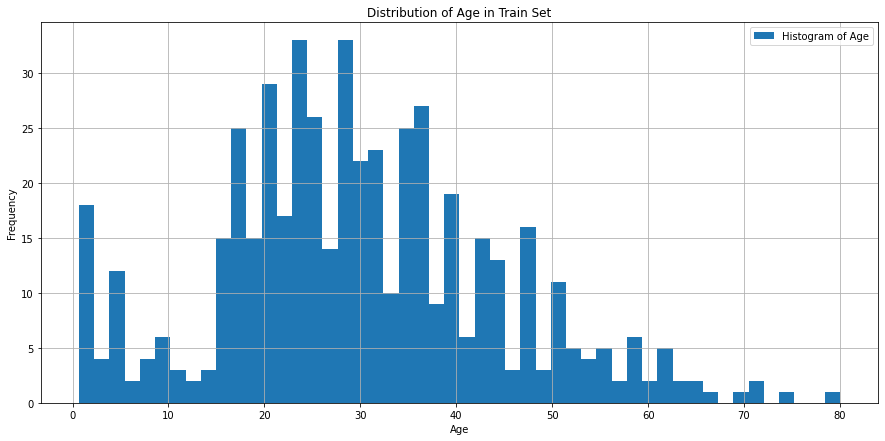

In [63]:
# Let's Check Type of Distirbution of Variable `Age`
fig, ax = plt.subplots(1, 1, figsize=(15, 7))

X_train_titanic.Age.hist(bins=50, ax=ax, label='Histogram of Age') # Histogram of original dataset
ax.set_title('Distribution of Age in Train Set')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.legend(loc="upper right")

print('Skewness : ', X_train_titanic.Age.skew())

In [64]:
# Display Value of Median Before Imputation

mean_titanic_age = X_train_titanic.Age.mean()
median_titanic_age = X_train_titanic.Age.median()

print('Mean Value - Train Set - Before Imputation   : ', mean_titanic_age)
print('Median Value - Train Set - Before Imputation : ', median_titanic_age)

Mean Value - Train Set - Before Imputation   :  29.915338645418327
Median Value - Train Set - Before Imputation :  29.0


In [65]:
# Function to Filling Missing Values with Zeroes, Mean, and Median

def impute_na(df, variable, mean_value, median_value):
  df[variable+'_mean'] = df[variable].fillna(mean_value)
  df[variable+'_median'] = df[variable].fillna(median_value)
  df[variable+'_zero'] = df[variable].fillna(0)
  
  return df

In [66]:
# Imputation Against Variable `Age`

X_train_titanic = impute_na(X_train_titanic, 'Age', mean_titanic_age, median_titanic_age)
X_test_titanic = impute_na(X_test_titanic, 'Age', mean_titanic_age, median_titanic_age)
X_train_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Age_median,Age_zero
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,51.000000,51.0,51.0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,49.000000,49.0,49.0
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S,1.000000,1.0,1.0
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S,54.000000,54.0,54.0
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,29.915339,29.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C,39.000000,39.0,39.0
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S,19.000000,19.0,19.0
629,630,0,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q,29.915339,29.0,0.0
559,560,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1,0,345572,17.4000,NaN,S,36.000000,36.0,36.0


#### Efek dari Imputasi Mean/Median

Imputasi mean/median mengubah varians dari distribusi asli variabel

In [67]:
# We can see a change in the variance after imputation

print('Variance - Orignal                 : ', X_train_titanic['Age'].std())
print('Variance - After Mean Imputation   : ', X_train_titanic['Age_mean'].std())
print('Variance - After Median Imputation : ', X_train_titanic['Age_median'].std())

Variance - Orignal                 :  14.506993804588454
Variance - After Mean Imputation   :  13.019703562523889
Variance - After Median Imputation :  13.024746215318785


<Figure size 432x288 with 0 Axes>

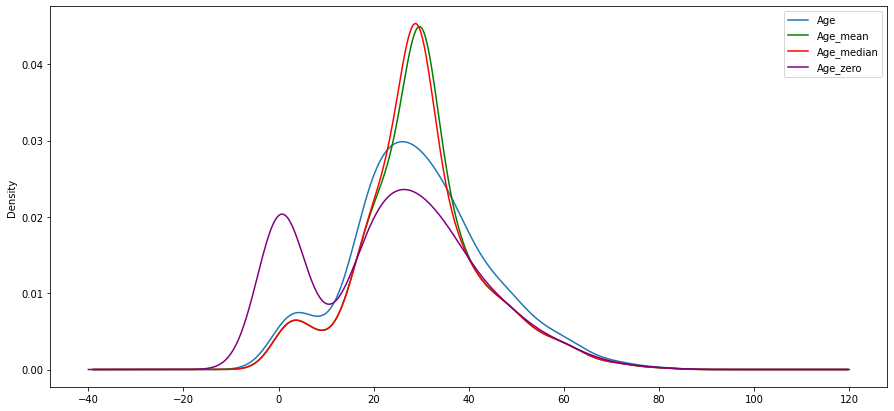

In [68]:
# Visualization Variable `Age` Before and After Imputation

fig = plt.figure()
fig, ax = plt.subplots(1, 1, figsize=(15, 7))

X_train_titanic.Age.plot(kind='kde', ax=ax)
X_train_titanic.Age_mean.plot(kind='kde', ax=ax, color='green')
X_train_titanic.Age_median.plot(kind='kde', ax=ax, color='red')
X_train_titanic.Age_zero.plot(kind='kde', ax=ax, color='purple')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Seperti disebutkan di atas, imputasi median mendistorsi distribusi asli dari variabel Age. Variabel yang ditransformasi menunjukkan lebih banyak nilai di sekitar nilai mean/median.

Mengisi NA dengan 0 juga mendistorsi distribusi variabel asli, menghasilkan akumulasi nilai sekitar 0. Kita akan melihat di bagian berikutnya metode imputasi NA yang mempertahankan distribusi variabel.

In [69]:
# Let's Compare the Performance of Random Forests using `Age` filled with Zeros, Mean, and Median

## Model with `Age_zero`

rf_zero = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_zero.fit(X_train_titanic[['Age_zero', 'Fare']], y_train_titanic)

pred_zero_train = rf_zero.predict_proba(X_train_titanic[['Age_zero', 'Fare']])
pred_zero_test = rf_zero.predict_proba(X_test_titanic[['Age_zero', 'Fare']])

print('Train set zero imputation')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train_titanic, pred_zero_train[:,1])))
print('Test set zero imputation')
print('Random Forests zero imputation roc-auc: {}'.format(roc_auc_score(y_test_titanic, pred_zero_test[:,1])))
print()

## Model with `Age_mean`
rf_mean = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_mean.fit(X_train_titanic[['Age_mean', 'Fare']], y_train_titanic)

pred_mean_train = rf_mean.predict_proba(X_train_titanic[['Age_mean', 'Fare']])
pred_mean_test = rf_mean.predict_proba(X_test_titanic[['Age_mean', 'Fare']])

print('Train set mean imputation')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train_titanic, pred_mean_train[:,1])))
print('Test set mean imputation')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test_titanic, pred_mean_test[:,1])))
print()

## Model with `Age_median`
rf_median = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_median.fit(X_train_titanic[['Age_median', 'Fare']], y_train_titanic)

pred_median_train = rf_median.predict_proba(X_train_titanic[['Age_median', 'Fare']])
pred_median_test = rf_median.predict_proba(X_test_titanic[['Age_median', 'Fare']])

print('Train set median imputation')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train_titanic, pred_median_train[:,1])))
print('Test set median imputation')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test_titanic, pred_median_test[:,1])))
print()

Train set zero imputation
Random Forests roc-auc: 0.7555855621353116
Test set zero imputation
Random Forests zero imputation roc-auc: 0.7490476190476191

Train set mean imputation
Random Forests roc-auc: 0.751648554261296
Test set mean imputation
Random Forests roc-auc: 0.7698809523809523

Train set median imputation
Random Forests roc-auc: 0.7515021366130887
Test set median imputation
Random Forests roc-auc: 0.7697619047619049



Kami melihat bahwa imputasi mean/median menghasilkan kinerja yang lebih baik daripada menggunakan nol (0). Mengapa?

In [70]:
print('Average total survival :', X_train_titanic.Survived.mean())

print('\nAverage real survival of children : ', X_train_titanic[X_train_titanic.Age<15].Survived.mean())
print('Average survival of children when using Age imputed with zeroes : ', X_train_titanic[X_train_titanic.Age_zero<15].Survived.mean())
print('Average survival of children when using Age imputed with mean   : ', X_train_titanic[X_train_titanic.Age_mean<15].Survived.mean())
print('Average survival of children when using Age imputed with median : ', X_train_titanic[X_train_titanic.Age_median<15].Survived.mean())

Average total survival : 0.3884430176565008

Average real survival of children :  0.5740740740740741
Average survival of children when using Age imputed with zeroes :  0.38857142857142857
Average survival of children when using Age imputed with mean   :  0.5740740740740741
Average survival of children when using Age imputed with median :  0.5740740740740741


Evaluasi :

- Anak-anak lebih mungkin untuk selamat dari bencana (0,57 untuk anak-anak vs 0,38 untuk seluruh Titanic). Dengan demikian, nilai Age yang lebih kecil merupakan indikator yang baik untuk kelangsungan hidup.

- Saat kita mengganti NA dengan nol, kita menutupi kekuatan prediksi Age. Setelah nol imputasi, sepertinya anak-anak tidak memiliki peluang lebih besar untuk bertahan hidup, dan oleh karena itu model kehilangan daya prediksi.

- Di sisi lain, mengganti NA dengan mean/median, mempertahankan daya prediksi variabel Age, karena nilai Age yang lebih kecil akan mendukung kelangsungan hidup.

Saran :

Penggantian NA dengan mean/median banyak digunakan dalam komunitas ilmu data dan dalam berbagai kompetisi ilmu data.

Biasanya, imputasi mean/median dilakukan bersama-sama dengan menambahkan variabel untuk menangkap pengamatan di mana data hilang, sehingga mencakup 2 sudut: jika data hilang sepenuhnya secara acak, ini akan dipertimbangkan oleh imputasi mean/median, dan jika bukan ini yang akan ditangkap oleh variabel tambahan.

Selain itu, kedua metode ini sangat mudah untuk diterapkan, dan oleh karena itu merupakan pilihan utama dalam kompetisi ilmu data.

---

# 2. Outliers

Reason :
1. Data Entry Error

Kesalahan manusia seperti kesalahan yang disebabkan selama pengumpulan, perekaman, atau entri data dapat menyebabkan outlier dalam data.

2. Measurement Errors (Instrument Error)

Hal ini disebabkan ketika alat ukur yang digunakan ternyata rusak.

3. Experimental Error

Ekstraksi data atau kesalahan perencanaan/eksekusi eksperimen.

4. Intentional Errors

Outliers tiruan dibuat untuk menguji metode deteksi.

5. Data Processing Errors

Manipulasi data atau kumpulan data mutasi yang tidak diinginkan.

6. Sampling Error 

Mengekstrak atau mencampur data dari salah atau berbagai sumber.

7. Natural Errors

Bukan kesalahan, hal baru dalam data. Ketika outlier tidak artifisial (karena kesalahan), itu adalah outlier alami. Sebagian besar data dunia nyata termasuk dalam kategori ini.

In [71]:
# print information for boston dataset
from sklearn.datasets import load_boston
print(load_boston().DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Purpose

Kita akan :
- Identifikasi ouliers di Variabel distribusi normal.
- Identifikasi outlier di variabel skewed.

In [72]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

# Boston house dataset for the demo
from sklearn.datasets import load_boston

In [73]:
# Load the Boston House dataset from sklearn
boston_dataset = load_boston()

# Create a dataframe with the independent variables
# Legends : 
  # - CRIM     per capita crime rate by town
  # - RM       average number of rooms per dwelling
  # - LSTAT    % lower status of the population

boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)[[
                          'RM', 'LSTAT', 'CRIM'
                      ]]

print('Shape data : ', boston.shape)
boston.head()

Shape data :  (506, 3)


,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905


In [74]:
# Load the Titanic dataset

url = 'https://www.openml.org/data/get_csv/16826755/phpMYEkMl'
titanic = pd.read_csv(url, usecols=['age', 'fare'])

# The variables age and fare have missing values. For this missing value, let's remove them.
titanic.dropna(subset=['age', 'fare'], inplace=True)
titanic['age'] = pd.to_numeric(titanic['age'], errors = 'coerce')
titanic['fare'] = pd.to_numeric(titanic['fare'], errors = 'coerce')
titanic['age'] = titanic['age'].astype(float)
titanic['fare'] = titanic['fare'].astype(float)

print('Shape data : ', titanic.shape, '\n')
print(titanic.info(), '\n')
titanic.head()

Shape data :  (1309, 2) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     1046 non-null   float64
 1   fare    1308 non-null   float64
dtypes: float64(2)
memory usage: 30.7 KB
None 



,age,fare
0,29.0000,211.3375
1,0.9167,151.5500
2,2.0000,151.5500
3,30.0000,151.5500
4,25.0000,151.5500


### Identifikasi distribusi variabel

Dalam variabel terdistribusi normal, outlier adalah nilai-nilai yang terletak di luar mean plus atau minus 3 kali standar deviasi. Namun, jika variabel miring, kami menemukan outlier menggunakan rentang antar-kuantil. Untuk memutuskan metode mana yang digunakan untuk mendeteksi outlier, pertama-tama kita perlu mengetahui distribusi variabel.

Kita dapat menggunakan histogram untuk menentukan apakah variabel terdistribusi normal. Kita juga dapat menggunakan boxplot untuk memvisualisasikan outlier secara langsung. Boxplot adalah cara standar untuk menampilkan distribusi variabel menggunakan kuartil pertama, median, kuartil ketiga dan kuartil.

Dengan melihat boxplot, anda dapat dengan mudah mengidentifikasi :
- Median, ditunjukkan oleh garis di dalam kotak.
- Rentang antar kuantil (IQR), kotak itu sendiri.
- Kuantil, ke-25 (Q1) adalah bagian bawah dan ke-75 (Q3) ujung atas kotak.
- Batasan, yang memanjang ke: -- batas atas: Q3 + 1,5 x IQR -- batas bawah: Q1 -1,5 x IQR

Nilai diluar batas atas maupun bawah adalah outliersnya.

In [75]:
# Function to create histogram and boxplot.
# This functions takes a dataframe (df) and the variable of interest as arguments.

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

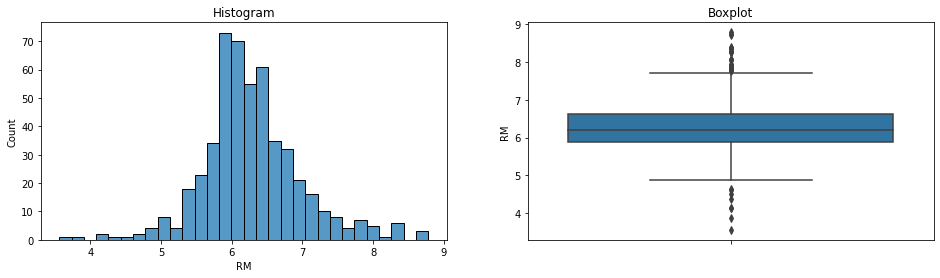


Skewness Value :  0.40361213328874385


In [76]:
# Let's start with the variable RM from the Boston House dataset.
# RM is the average number of rooms per dwelling

diagnostic_plots(boston, 'RM')
print('\nSkewness Value : ', boston['RM'].skew())

Dari histogram, kita melihat bahwa variabel rm mendekati distribusi Gaussian dengan cukup baik. Dalam boxplot, kita melihat bahwa variabel dapat memiliki outlier, karena ada banyak titik yang berada di luar batas, di kedua ekor distribusi.

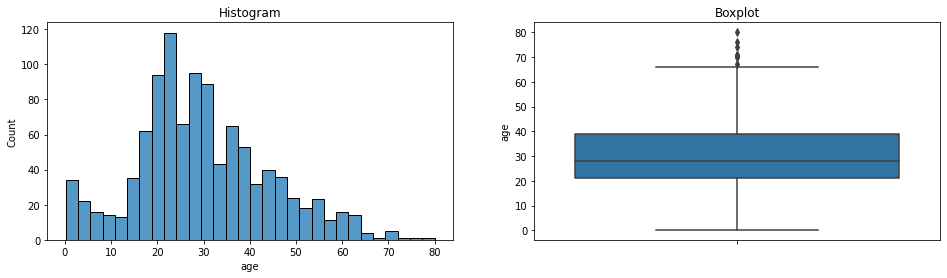


Skewness Value :  0.4076718864978293


In [77]:
# let's inspect now the variable Age from the titanic
# refers to the age of the passengers on board

diagnostic_plots(titanic, 'age')
print('\nSkewness Value : ', titanic['age'].skew())

Dari histogram, kita melihat bahwa variabel mendekati distribusi Gaussian dengan cukup baik. Terjadi penyimpangan dari distribusi ke arah nilai umur yang lebih kecil. Dalam boxplot, kita dapat melihat bahwa variabel dapat memiliki outlier, karena ada banyak titik yang berada di luar whisker, di ujung kanan distribusi (whiser atas di boxplot).

### Skewed Variable

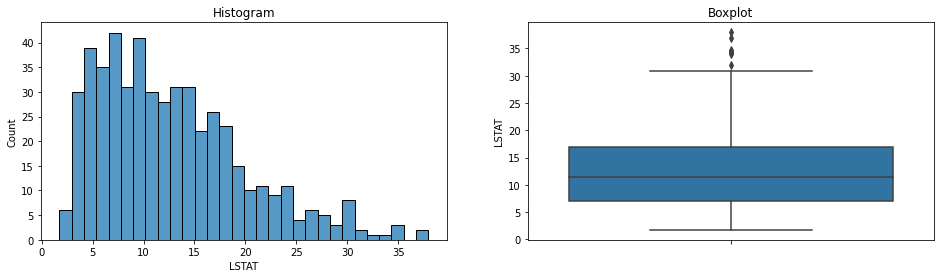


Skewness Value :  0.9064600935915367


In [78]:
# Variable LSTAT from the boston house dataset
# LSTAT is the % lower status of the population

diagnostic_plots(boston, 'LSTAT')
print('\nSkewness Value : ', boston['LSTAT'].skew())

LSTAT tidak terdistribusi normal, ia miring dengan ekor ke kanan. Menurut boxplot, ada beberapa outlier di ujung kanan distribusi variabel.

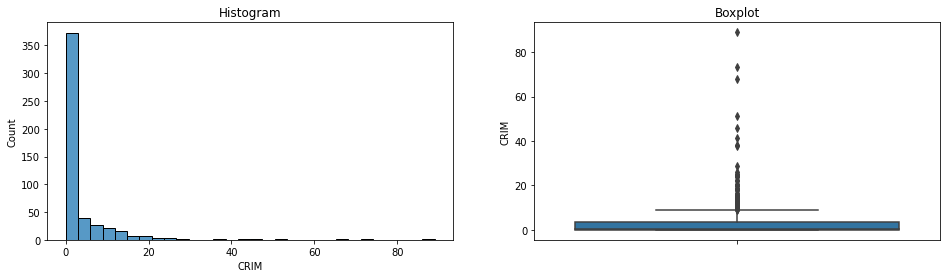


Skewness Value :  5.223148798243851


In [79]:
# Variable CRIM from the boston house dataset
# CRIM is the per capita crime rate by town

diagnostic_plots(boston, 'CRIM')
print('\nSkewness Value : ', boston['CRIM'].skew())

CRIM sangat miring, dengan ekor ke kanan. Tampaknya ada beberapa outlier juga di ujung kanan distribusi, terlihat jelas di boxplot.

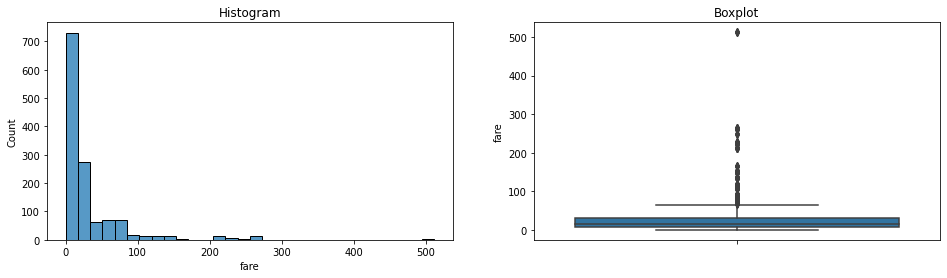


Skewness Value :  4.367709134122922


In [80]:
# Variable Fare from the titanic dataset
# Fare is the price paid for the ticket by the passengers

diagnostic_plots(titanic, 'fare')
print('\nSkewness Value : ', titanic['fare'].skew())

Tarif (Fare) juga sangat miring, dan menunjukkan beberapa nilai yang tidak biasa di ujung kanan distribusinya.

Di sel berikutnya, kami akan mengidentifikasi outlier menggunakan:

- mean dan standar deviasi untuk variabel RM dan Age masing-masing dari kumpulan data boston dan titanic.

- rentang antar-kuantil untuk mengidentifikasi outlier untuk variabel LSTAT, CRIM, dan Fare dari kumpulan data boston dan titanic.

### Outlier detection for Normally distributed variables

In [81]:
# Function to find upper and lower boundaries for normally distributed variables
# Calculate the boundaries outside which sit the outliers for a Gaussian distribution

def find_normal_boundaries(df, variable):
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

In [82]:
# calculate boundaries for RM
upper_boundary, lower_boundary = find_normal_boundaries(boston, 'RM')
upper_boundary, lower_boundary

(8.392485817597748, 4.176782957105809)

Dari penjelasan di atas kami menyimpulkan bahwa nilai yang lebih besar dari 8,4 atau lebih kecil dari 4,2 sangat jarang terjadi untuk variabel RM. Oleh karena itu, kita dapat menganggapnya sebagai outlier.

In [83]:
# Inspect the number and percentage of outliers for `RM`

print('Total number of houses: {}'.format(len(boston)))
print('Houses with more than 8.4 rooms (right end outliers) : {}'.format(len(boston[boston['RM'] > upper_boundary])))
print('Houses with less than 4.2 rooms (left end outliers)  : {}'.format(len(boston[boston['RM'] < lower_boundary])))
print('')
print('% right end outliers : {}'.format(len(boston[boston['RM'] > upper_boundary]) / len(boston) * 100))
print('% left end outliers : {}'.format(len(boston[boston['RM'] < lower_boundary]) / len(boston) * 100))

Total number of houses: 506
Houses with more than 8.4 rooms (right end outliers) : 4
Houses with less than 4.2 rooms (left end outliers)  : 4

% right end outliers : 0.7905138339920948
% left end outliers : 0.7905138339920948


Menggunakan Analisis Nilai Ekstrim kami mengidentifikasi outlier di kedua ujung distribusi RM. Persentase outlier kecil (1,58% mempertimbangkan 2 ekor bersama-sama), yang masuk akal, karena kami menemukan outlier dengan tepat. Artinya, nilai langka, kejadian langka.

In [84]:
# Calculate boundaries for `Age` in the titanic

upper_boundary, lower_boundary = find_normal_boundaries(titanic, 'age')
upper_boundary, lower_boundary

(73.1216336121991, -13.359364587342501)

In [85]:
# Lets look at the number and percentage of outliers

print('Total passengers         : {}'.format(len(titanic)))
print('Passengers older than 73 : {}'.format(len(titanic[titanic['age'] > upper_boundary])))
print('')
print('% of passengers older than 73 : {}'.format(len(titanic[titanic['age'] > upper_boundary]) / len(titanic) * 100))

Total passengers         : 1309
Passengers older than 73 : 3

% of passengers older than 73 : 0.2291825821237586


Ada 3 penumpang yang memiliki umur lebih dari 73 di kapal titanic, yang dapat dianggap outliers, sebagai mayoritas populasi di mana jauh lebih muda.

### Outlier detection for skewed variables

In [86]:
# Function to find upper and lower boundaries for skewed distributed variables
# Let's calculate the boundaries outside which sit the outliers for skewed distributions
# Distance passed as an argument, gives us the option to estimate 1.5 times or 3 times the IQR to calculate the boundaries.

def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [87]:
# Looking for outliers, using the interquantile proximity rule IQR * 1.5, for `LSTAT` in the boston house dataset

upper_boundary, lower_boundary = find_skewed_boundaries(boston, 'LSTAT', 1.5)
upper_boundary, lower_boundary

(31.962500000000006, -8.057500000000005)

In [88]:
# Lets look at the number and percentage of outliers for `LSTAT`

print('Total houses : {}'.format(len(boston)))
print('Houses with LSTAT bigger than 32   : {}'.format(len(boston[boston['LSTAT'] > upper_boundary])))
print('')
print('% houses with LSTAT bigger than 32 : {}'.format(len(boston[boston['LSTAT'] > upper_boundary])/len(boston) * 100))

Total houses : 506
Houses with LSTAT bigger than 32   : 7

% houses with LSTAT bigger than 32 : 1.383399209486166


Batas atas menunjukkan nilai ~32. Batas bawah adalah negatif, namun variabel LSTAT tidak mengambil nilai negatif. Jadi untuk menghitung outlier untuk LSTAT kita hanya menggunakan batas atas. Ini bertepatan dengan apa yang kami amati dalam plot kotak sebelumnya di buku catatan. Pencilan hanya duduk di ekor kanan distribusi LSTAT. Kami mengamati 7 rumah, 1,38% dari kumpulan data, dengan nilai LSTAT yang sangat tinggi.

In [89]:
# Looking for outliers, using the interquantile proximity rule IQR * 1.5, for `CRIM` in the boston house dataset

upper_boundary, lower_boundary = find_skewed_boundaries(boston, 'CRIM', 1.5)
upper_boundary, lower_boundary

(9.06963875, -5.31051125)

In [90]:
# Lets look at the number and percentage of outliers for `CRIM`

print('Total houses : {}'.format(len(boston)))
print('Houses with CRIM bigger than 9   : {}'.format(len(boston[boston['CRIM'] > upper_boundary])))
print('')
print('% houses with CRIM bigger than 9 : {}'.format(len(boston[boston['CRIM'] > upper_boundary]) / len(boston) * 100))

Total houses : 506
Houses with CRIM bigger than 9   : 66

% houses with CRIM bigger than 9 : 13.043478260869565


In [91]:
# Looking for outliers, using the interquantile proximity rule IQR * 3, now lets looking for extremely high values for `CRIM` in the boston house dataset

upper_boundary, lower_boundary = find_skewed_boundaries(boston, 'CRIM', 3)
upper_boundary, lower_boundary

(14.462195000000001, -10.7030675)

In [92]:
# Lets look at the number and percentage of outliers for `CRIM`

print('Total houses : {}'.format(len(boston)))
print('Houses with CRIM bigger than 14   : {}'.format(len(boston[boston['CRIM'] > upper_boundary])))
print('')
print('% houses with CRIM bigger than 14 : {}'.format(len(boston[boston['CRIM'] > upper_boundary]) / len(boston) * 100))

Total houses : 506
Houses with CRIM bigger than 14   : 30

% houses with CRIM bigger than 14 : 5.928853754940711


Ketika menggunakan :
- Rentang antar-kuantil 1.5 kali untuk menemukan outliers, kami menemukan bahwa ~13% rumah menunjukkan area tingkat kejahatan yang luar biasa tinggi.
- Rentang antar-kuantil 3 kali untuk menemukan outlier, kami menemukan bahwa ~6% rumah menunjukkan area tingkat kejahatan yang luar biasa tinggi.

Untuk CRIM juga, batas bawahnya negatif, jadi masuk akal untuk menggunakan batas atas untuk menghitung outlier, karena variabel hanya mengambil nilai positif. Ini bertepatan dengan apa yang kami amati pada boxplot CRIM sebelumnya di notebook ini.

In [93]:
# Finally, identify outliers in `Fare` in the titanic dataset. Lets look again for extreme values using IQR * 3

upper_boundary, lower_boundary = find_skewed_boundaries(titanic, 'fare', 3)
upper_boundary, lower_boundary

(101.4126, -62.24179999999999)

In [94]:
# Lets look at the number and percentage of passengers who paid extremely high Fares

print('Total passengers : {}'.format(len(titanic)))
print('Passengers who paid more than 117   : {}'.format(len(titanic[titanic['fare'] > upper_boundary])))
print('')
print('% passengers who paid more than 117 : {}'.format(len(titanic[titanic['fare'] > upper_boundary])/len(titanic) * 100))

Total passengers : 1309
Passengers who paid more than 117   : 84

% passengers who paid more than 117 : 6.417112299465241


Untuk Fare (Tarif), serta untuk semua variabel lain dalam buku catatan ini yang menunjukkan right-skewed, batas bawahnya adalah negatif. Jadi kita akan menggunakan batas atas untuk menentukan outlier. Kami mengamati bahwa 6.4% dari nilai dataset jatuh di atas bawah.

## Trimming